# Logistic Regression Notes

## Logistic Regression Theory
* We want to learn about Logistic Regression as amethod for classsification
* Two classes is known as Binary Classification
* Classification Problems involve discrete categorical response(s)
* Bounds on the y axis are between 0 and 1
* Sigmoid Function takes any value and outputs in the range of 0 to 1
* Theta(z) = 1/(1+e^(-z))
* Linear Regression = b0+b1x+... and place it into z, we change the bounds of the output. Logistic Regression = 1/(1+e^-(b0+b1x+...))
* Results in a probability that when combined with a cutoff implies the probability a value will belong to some class
* You can evaluate the model performance using a Confusion Matrix to compute its performance on test data (image below)


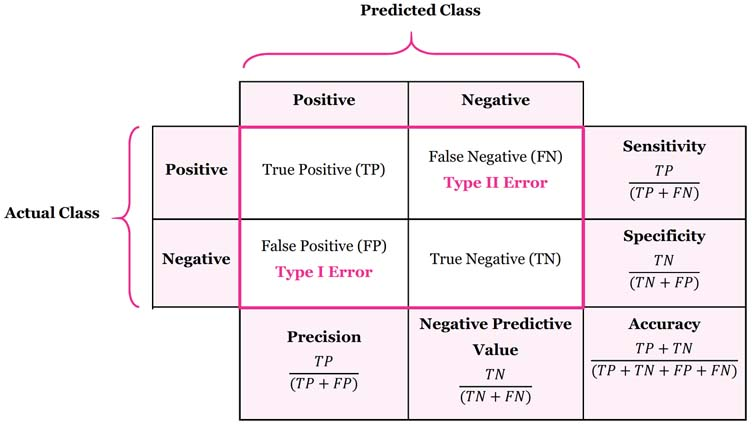

## Data Exploration

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
train = pd.read_csv('/home/peterjr/RepoCollections/DS_ML_Pierian/CourseFiles/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
test = pd.read_csv('/home/peterjr/RepoCollections/DS_ML_Pierian/CourseFiles/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_test.csv')

In [90]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

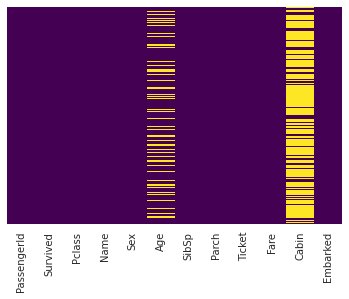

In [91]:
#Visualize the missing data with seaborn (heatmap)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [92]:
#Age seems like a reasonable column to impute
#Cabin seems like a reasonable column to transform or drop 
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

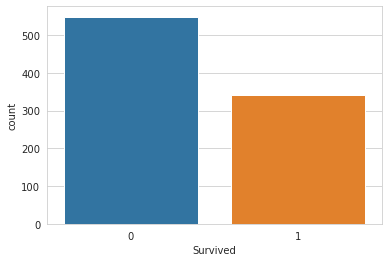

In [93]:
#More people did not survive as we can see below
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

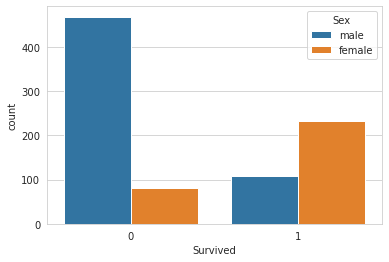

In [94]:
#Survival based on gender (male less likely to survive)
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

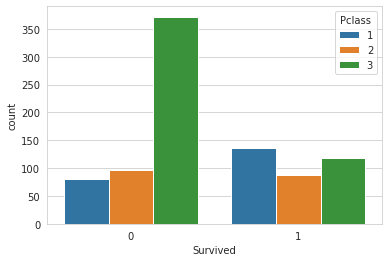

In [95]:
#Survival based on class
sns.countplot(x='Survived',hue='Pclass',data=train)

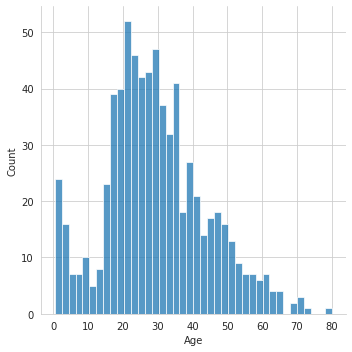

In [96]:
sns.displot(train['Age'].dropna(),kde=False,bins=40)

In [97]:
#Getting some information about each column in our training frame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

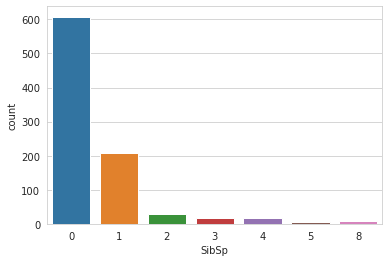

In [98]:
#Not many people had a spouse or sibling aboard the ship
sns.countplot(x='SibSp',data=train)

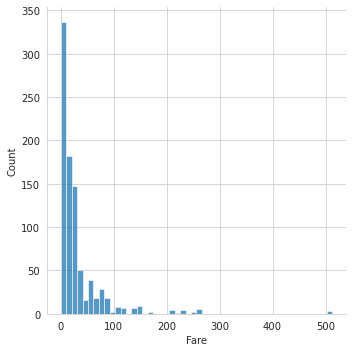

In [99]:
sns.displot(train['Fare'].dropna(),bins=50)

In [100]:
#Interactive plotting
import cufflinks as cf
cf.go_offline()

In [101]:
train['Fare'].iplot(kind='hist',bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

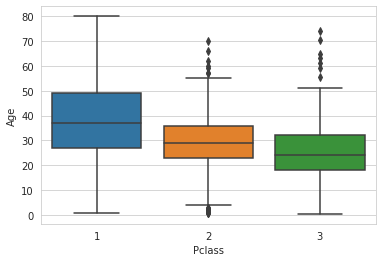

In [102]:
sns.boxplot(x='Pclass',y='Age',data=train)

## Data Cleaning

In [103]:
#Impute age based on class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [104]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

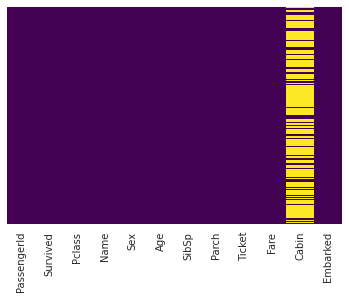

In [105]:
#Now we no longer have missingness in the Age column
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [106]:
#Drop the cabin column since there are too many missing values
train.drop('Cabin',axis=1,inplace=True)

In [107]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

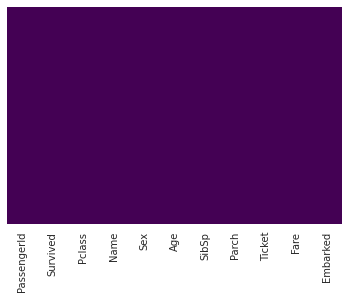

In [108]:
#No missingness
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [109]:
#Convert categorical variables into dummy variables
#drop_first creates a reference dummy (K-1 dummies for K categorical)
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [110]:
train = pd.concat([train,sex,embark],axis=1)

In [111]:
#We can get rid of our original sex and embarked columns + some others
train.drop(['Name','Sex','Embarked','Ticket','PassengerId'],axis=1,inplace=True)

In [112]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression with Sci-Kit Learn

In [113]:
#For the sake of notes let's pretend that our train set is all of our data
X=train.drop('Survived',axis=1)
y=train['Survived']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
#25% of our data will be left out for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=342)

In [121]:
from sklearn.linear_model import LogisticRegression

In [123]:
#Creating an instance of a Logistic Regression Model
logModel = LogisticRegression()

In [124]:
logModel.fit(X_train,y_train)

LogisticRegression()

### Some different ways to view error for this model

In [126]:
predictions = logModel.predict(X_test)

In [128]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       143
           1       0.64      0.68      0.65        80

    accuracy                           0.74       223
   macro avg       0.72      0.73      0.73       223
weighted avg       0.75      0.74      0.75       223



In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
confusion_matrix(y_test,predictions)

array([[112,  31],
       [ 26,  54]])

In [133]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test,predictions)

0.2556053811659193